# DATA EXPLORATION

In [1]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import *

In [2]:
# Dataset
path_dev = "./data/development.csv"
df = pd.read_csv(path_dev)
df.head()

,id,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday
0,0,http://mashable.com/2014/09/08/safest-cabbies-...,121.0,12.0,1015.0,0.422018,1.0,0.545031,10.0,6.0,...,-0.160714,-0.50,-0.071429,0.0,0.00,0.5,0.00,2900,bus,tuesday
1,1,http://mashable.com/2013/07/25/3d-printed-rifle/,532.0,9.0,503.0,0.569697,1.0,0.737542,9.0,0.0,...,-0.157500,-0.25,-0.100000,0.0,0.00,0.5,0.00,1300,tech,thursday
2,2,http://mashable.com/2013/10/30/digital-dinosau...,435.0,9.0,232.0,0.646018,1.0,0.748428,12.0,3.0,...,-0.427500,-1.00,-0.187500,0.0,0.00,0.5,0.00,17700,lifestyle,wednesday
3,3,http://mashable.com/2014/08/27/homer-simpson-i...,134.0,12.0,171.0,0.722892,1.0,0.867925,9.0,5.0,...,-0.216667,-0.25,-0.166667,0.4,-0.25,0.1,0.25,1500,bus,wednesday
4,4,http://mashable.com/2013/01/10/creepy-robotic-...,728.0,11.0,286.0,0.652632,1.0,0.800000,5.0,2.0,...,-0.251786,-0.50,-0.100000,0.2,-0.10,0.3,0.10,1400,tech,thursday


In [3]:
# Checking Nan Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31715 entries, 0 to 31714
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            31715 non-null  int64  
 1   url                           31715 non-null  object 
 2   timedelta                     31715 non-null  float64
 3   n_tokens_title                31715 non-null  float64
 4   n_tokens_content              31715 non-null  float64
 5   n_unique_tokens               31715 non-null  float64
 6   n_non_stop_words              31715 non-null  float64
 7   n_non_stop_unique_tokens      31715 non-null  float64
 8   num_hrefs                     31715 non-null  float64
 9   num_self_hrefs                31715 non-null  float64
 10  num_imgs                      25340 non-null  float64
 11  num_videos                    25384 non-null  float64
 12  average_token_length          31715 non-null  float64
 13  n

The features that contains NaN values are:
- num_keywords
- num_imgs
- num_videos

In [4]:
# Replace missing values with 0

NaN_columns = ['num_keywords','num_imgs','num_videos']
for el in NaN_columns:
    mean_values = df.groupby('data_channel')[el].mean()
    # Iterate over each group and fill NaN values with the corresponding mean
    for group, mean in mean_values.items():
      df.loc[df['data_channel'] == group, el] = df.loc[df['data_channel'] == group, el].fillna(mean)
#df['num_imgs','num_videos','num_keyword'].fillna(df['num_imgs','num_videos','num_keyword'].mean())
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31715 entries, 0 to 31714
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            31715 non-null  int64  
 1   url                           31715 non-null  object 
 2   timedelta                     31715 non-null  float64
 3   n_tokens_title                31715 non-null  float64
 4   n_tokens_content              31715 non-null  float64
 5   n_unique_tokens               31715 non-null  float64
 6   n_non_stop_words              31715 non-null  float64
 7   n_non_stop_unique_tokens      31715 non-null  float64
 8   num_hrefs                     31715 non-null  float64
 9   num_self_hrefs                31715 non-null  float64
 10  num_imgs                      31715 non-null  float64
 11  num_videos                    31715 non-null  float64
 12  average_token_length          31715 non-null  float64
 13  n

In [5]:
df.describe()

,id,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,31715.00000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,...,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000
mean,15857.00000,354.058206,10.390730,544.048179,0.530754,0.970140,0.672973,10.865143,3.274381,4.536785,...,0.095466,0.756271,-0.259198,-0.521164,-0.107397,0.281647,0.069909,0.341805,0.155974,3407.068863
std,9155.47623,214.314223,2.115643,467.730448,0.137106,0.170203,0.154128,11.295386,3.822364,7.516498,...,0.071362,0.247798,0.127508,0.290352,0.094932,0.323834,0.265514,0.188980,0.225957,11899.460219
min,0.00000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,4.000000
25%,7928.50000,163.000000,9.000000,246.000000,0.471276,1.000000,0.626028,4.000000,1.000000,1.000000,...,0.050000,0.600000,-0.328333,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,15857.00000,338.000000,10.000000,409.000000,0.539568,1.000000,0.690909,7.000000,3.000000,1.000000,...,0.100000,0.800000,-0.252976,-0.500000,-0.100000,0.144444,0.000000,0.500000,0.000000,1400.000000
75%,23785.50000,542.000000,12.000000,713.000000,0.608523,1.000000,0.754644,14.000000,4.000000,6.000000,...,0.100000,1.000000,-0.186111,-0.300000,-0.050000,0.500000,0.141667,0.500000,0.250000,2800.000000
max,31714.00000,731.000000,23.000000,8474.000000,1.000000,1.000000,1.000000,304.000000,116.000000,128.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [6]:
#Remove strange outliers with some data with 0 values
mask = (df['average_token_length'] == 0) & (df['n_tokens_content'] == 0)
df.drop(df[mask].index, axis = 0, inplace = True)

### n_tokens_title
This feature is bell-shaped. A log transformation is not necessary. It will be better to normalized it.

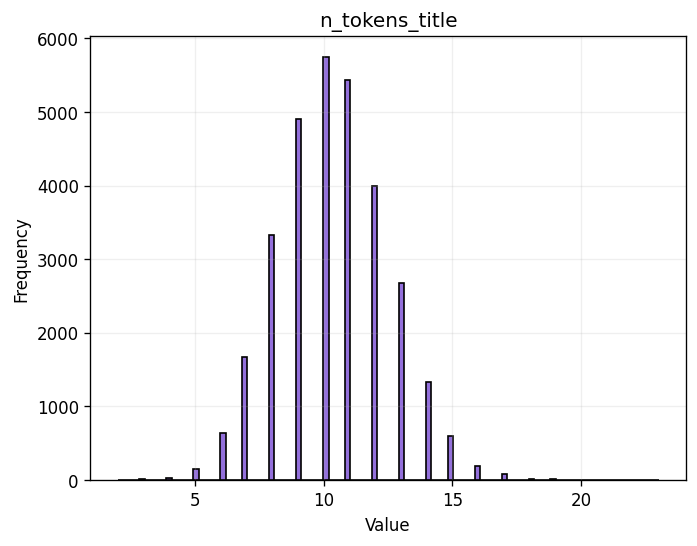

minimum value 2.0
maximum value 23.0


In [7]:
plot_hist('n_tokens_title', df)

### n_tokens_content
This feature is not bell shaped so it will be better make a log transformation and remove zeros since it is not a reasonable value, it will be for sure a human error.

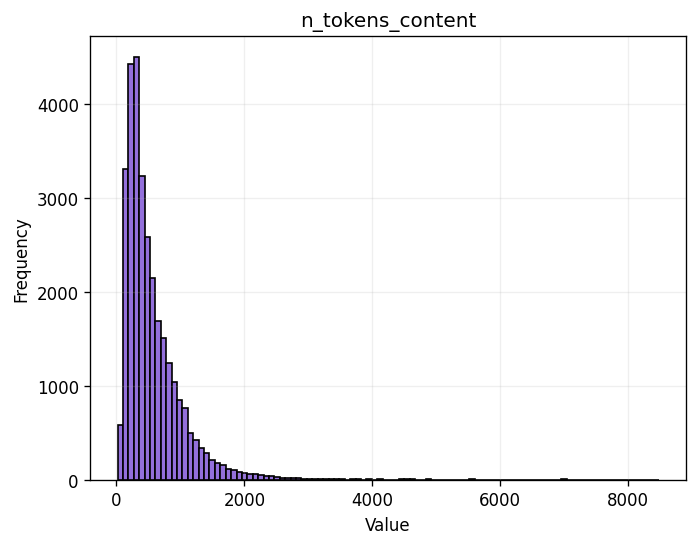

minimum value 18.0
maximum value 8474.0


In [8]:
plot_hist('n_tokens_content',df)

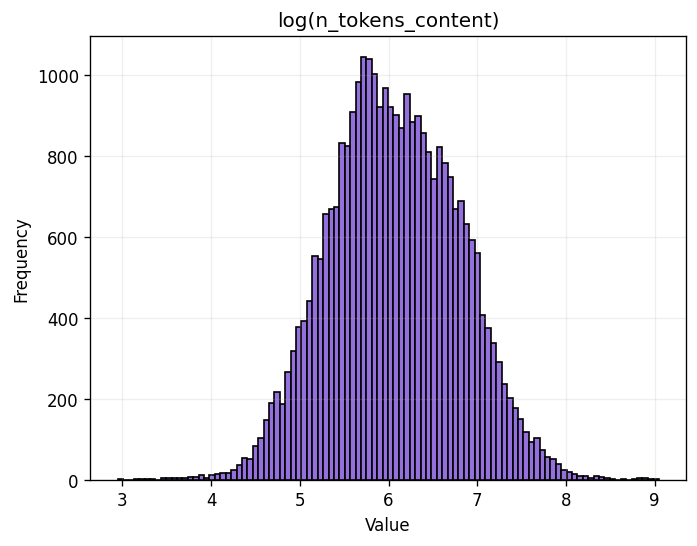

minimum value 2.9444389791664403
maximum value 9.044875932248651


In [9]:
plot_log_hist('n_tokens_content', df)

### n_unique_tokens
This feature is bell-shaped, we can just normalize it.

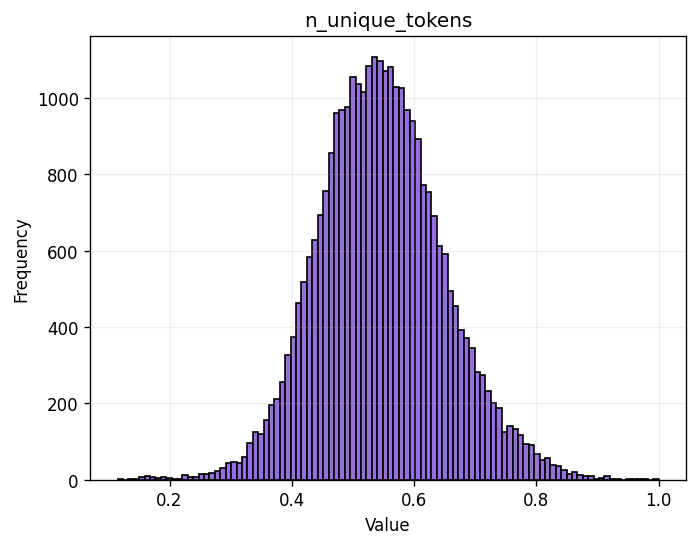

minimum value 0.114963503597
maximum value 0.999999966667


In [10]:
plot_hist("n_unique_tokens",df)

### n_non_stop_words
This feature is not bell shaped. A log transformation will be necessary even if will make values negative. Also, we could delete some outliers

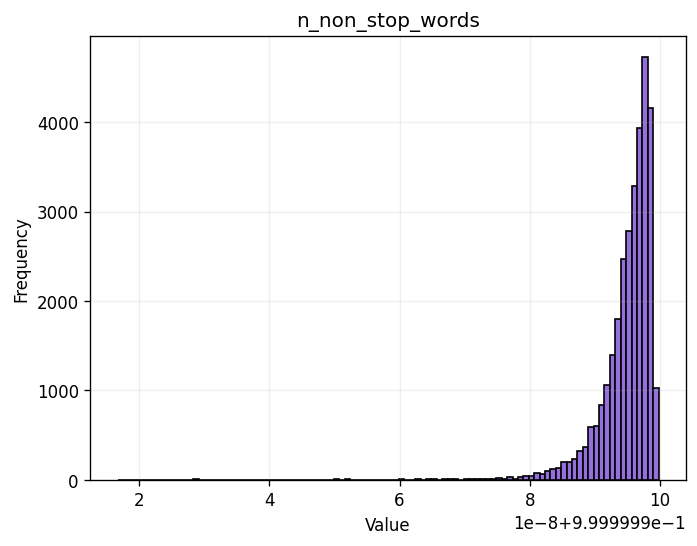

minimum value 0.999999916667
maximum value 0.99999999978


In [11]:
plot_hist('n_non_stop_words',df)

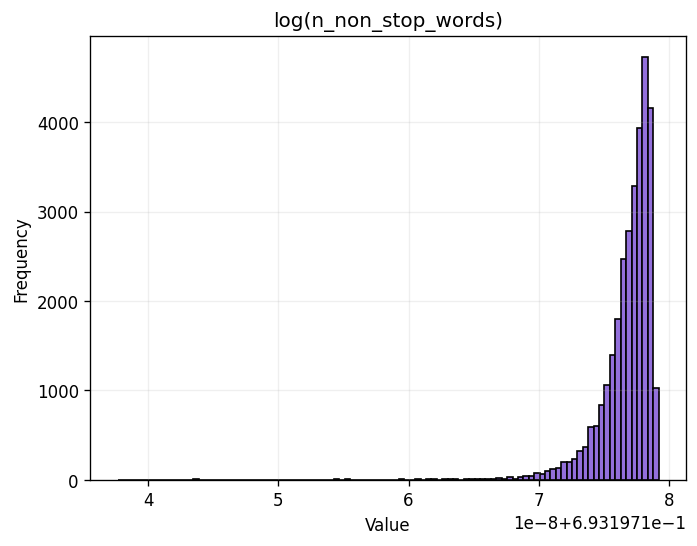

minimum value 0.6931471388934444
maximum value 0.6931471804499453


In [12]:
plot_log_hist('n_non_stop_words',df)

### n_non_stop_unique_tokens
Bell shaped. A normalization can be applied.

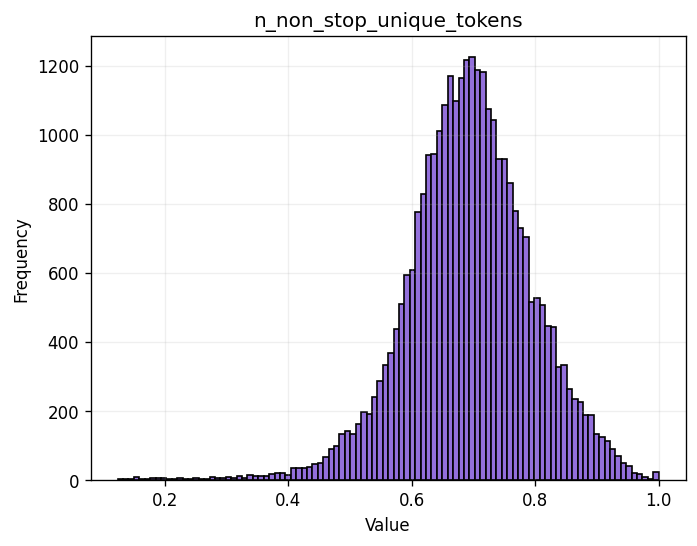

minimum value 0.123214285494
maximum value 0.999999985507


In [13]:
plot_hist("n_non_stop_unique_tokens",df)

### num_hrefs
Not bell-shaped, a log trasformation will be necessary, even if zeros values will change the distribution, it will be necessary to delete them.

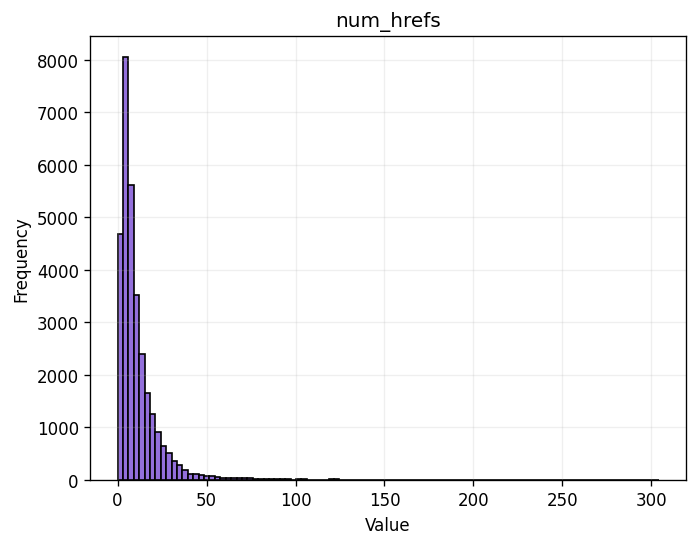

minimum value 0.0
maximum value 304.0


In [14]:
plot_hist("num_hrefs",df)

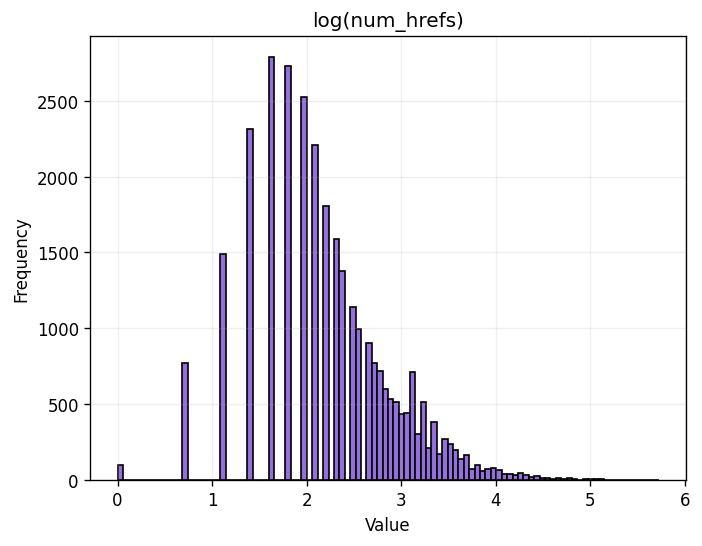

minimum value 0.0
maximum value 5.720311776607412


In [15]:
plot_log_hist("num_hrefs",df)

### num_self_hrefs
not bell shaped, better apply a log trasformation, but there are zero values that change the distribution.

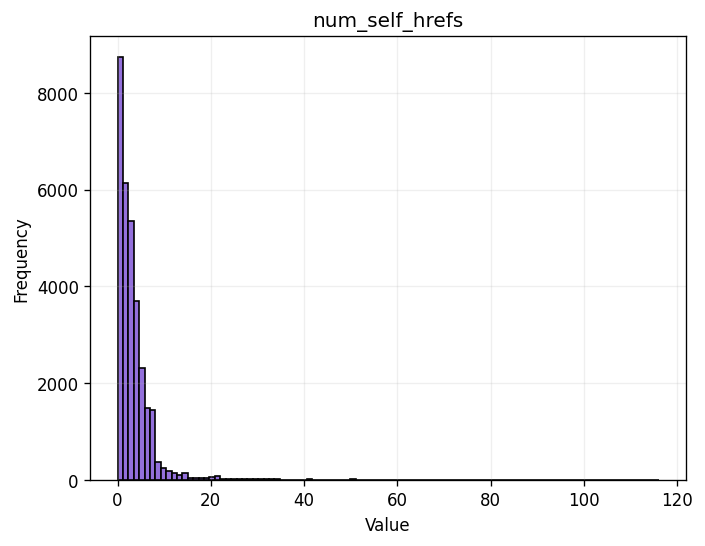

minimum value 0.0
maximum value 116.0


In [16]:
plot_hist("num_self_hrefs",df)

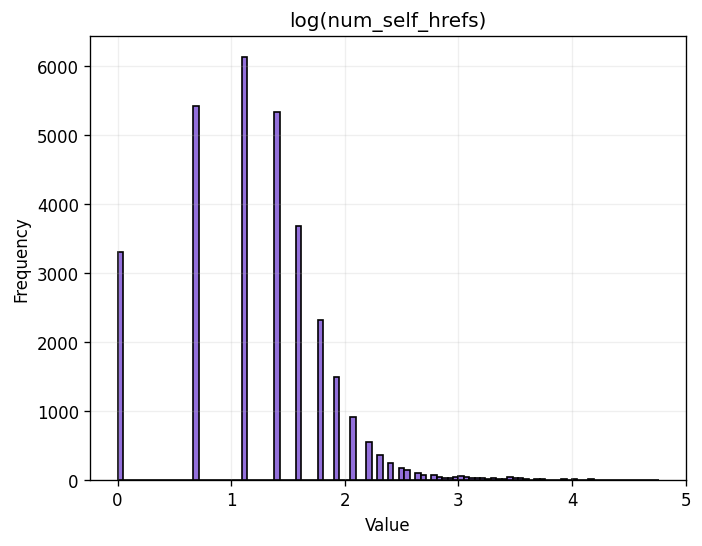

minimum value 0.0
maximum value 4.762173934797756


In [17]:
plot_log_hist("num_self_hrefs",df)

### num_imgs
even applying log transformation there are too many zeros to make the distribution normal. You can also try to fill nan values with the mean

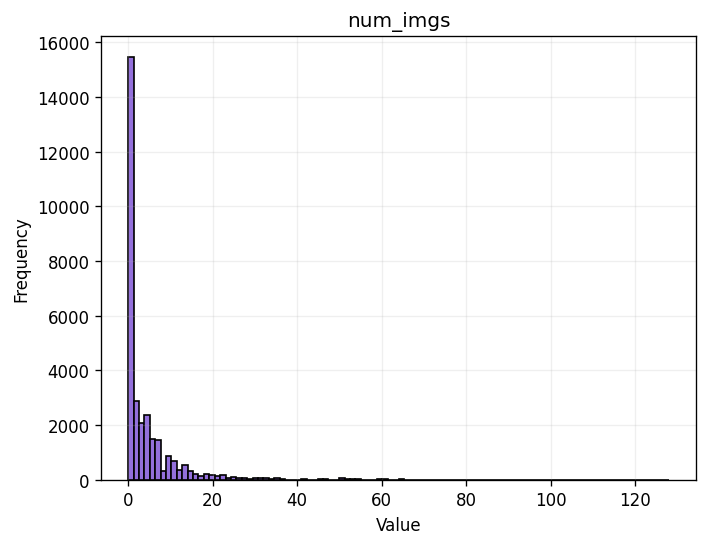

minimum value 0.0
maximum value 128.0


In [18]:
plot_hist("num_imgs",df)

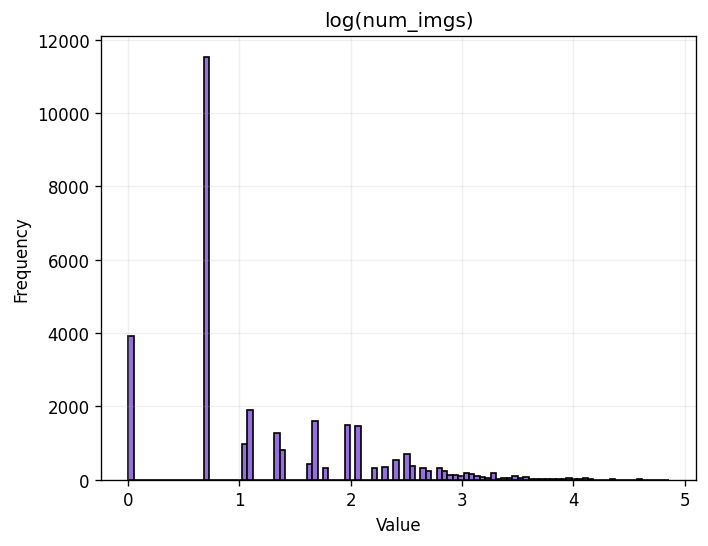

minimum value 0.0
maximum value 4.859812404361672


In [19]:
plot_log_hist("num_imgs",df)

### num_videos
Not bell shaped and too many zero.

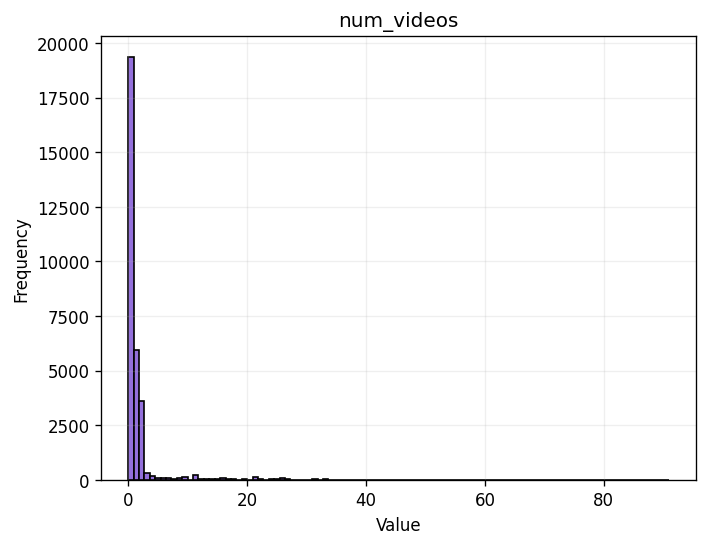

minimum value 0.0
maximum value 91.0


In [20]:
plot_hist("num_videos",df)

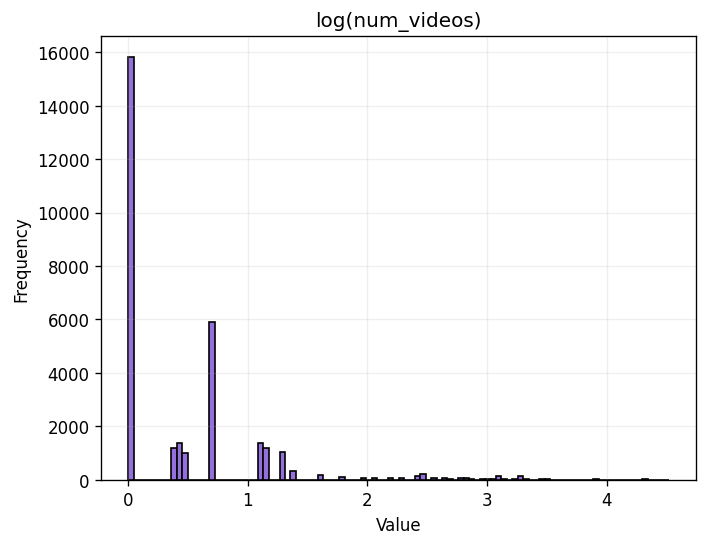

minimum value 0.0
maximum value 4.5217885770490405


In [21]:
plot_log_hist("num_videos",df)

### average_token_length
It is bell shaped, a normalization can be applied and some outliers could be removed.

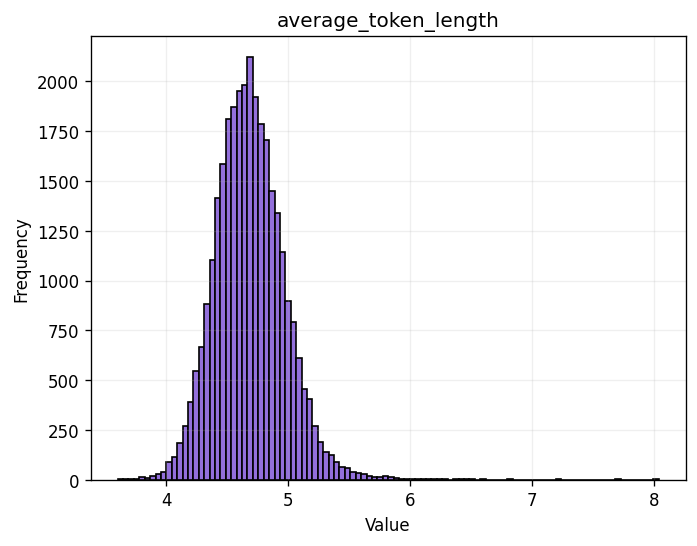

minimum value 3.6
maximum value 8.04153354633


In [22]:
plot_hist("average_token_length",df)

### num_keywords
Not bell shaped but a log transformation will not improve the distribution. We can perform a normalization.

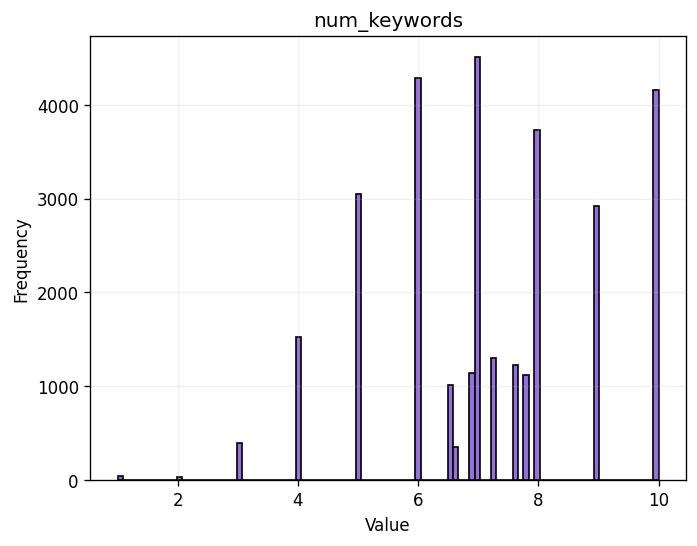

minimum value 1.0
maximum value 10.0


In [23]:
plot_hist("num_keywords",df)

### kw_min_min
There are outliers around 200, it would be better to remove it and then we could apply normalization

0         -1.0
1          4.0
2          4.0
3         -1.0
4        217.0
         ...  
31709     -1.0
31710     -1.0
31712     -1.0
31713      4.0
31714     -1.0
Name: kw_min_min, Length: 30768, dtype: float64


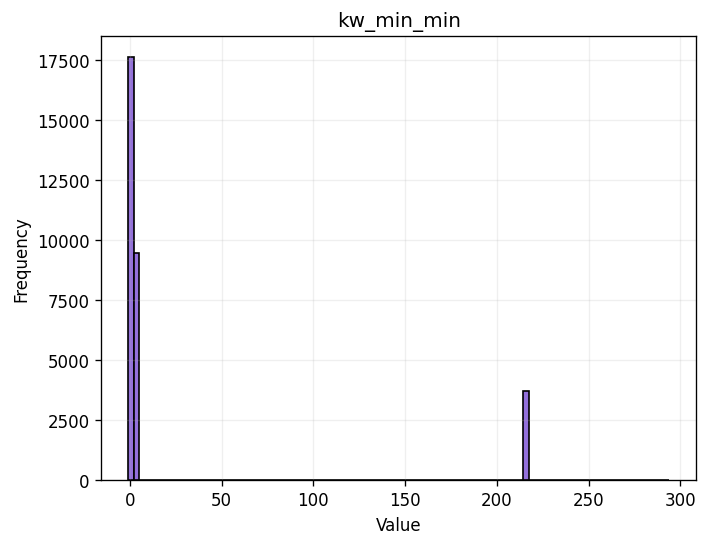

minimum value -1.0
maximum value 294.0


In [24]:
print(df["kw_min_min"])
plot_hist("kw_min_min",df)

### kw_max_min
Not bell shaped, apply log transformation.

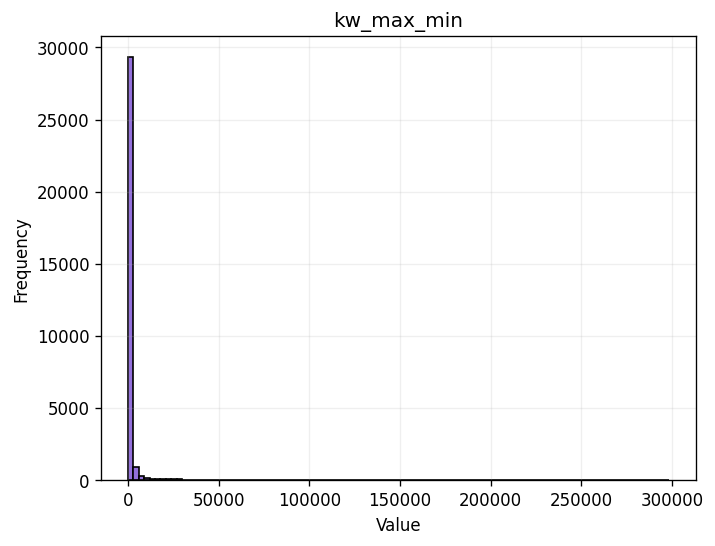

minimum value 0.0
maximum value 298400.0


In [25]:
plot_hist("kw_max_min",df)

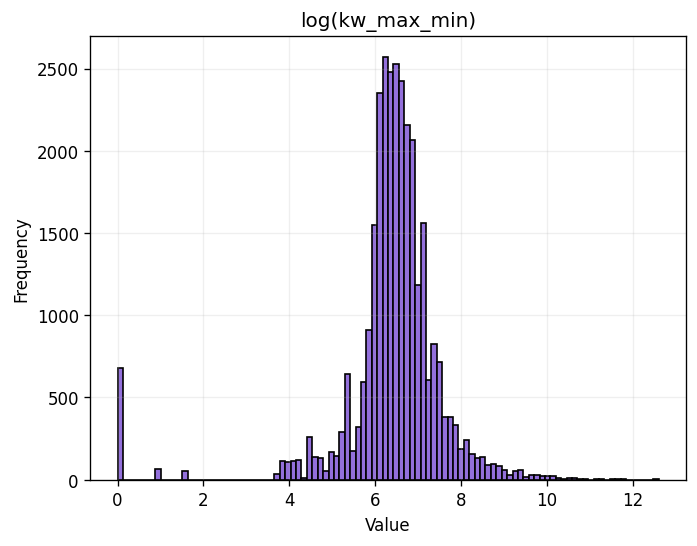

minimum value 0.0
maximum value 12.606193498512562


In [26]:
plot_log_hist("kw_max_min",df)

### kw_avg_min
Not bell shaped, apply log transformation. Also, some outliers could be removed.

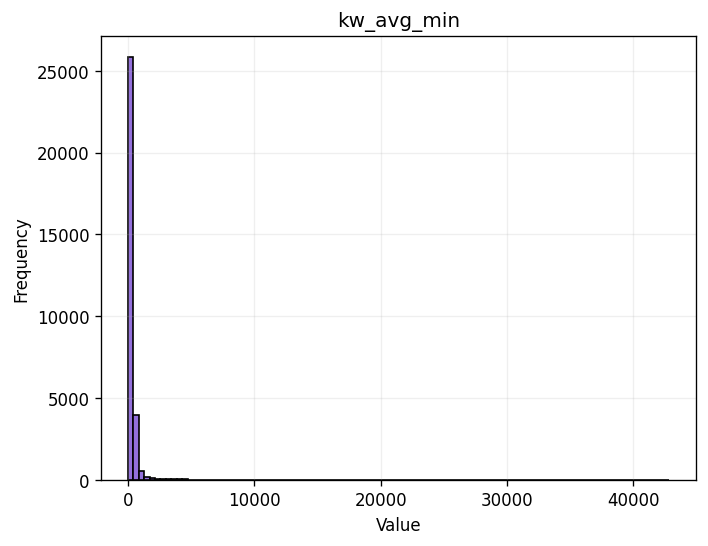

minimum value -1.0
maximum value 42827.8571429


In [27]:
plot_hist("kw_avg_min",df)

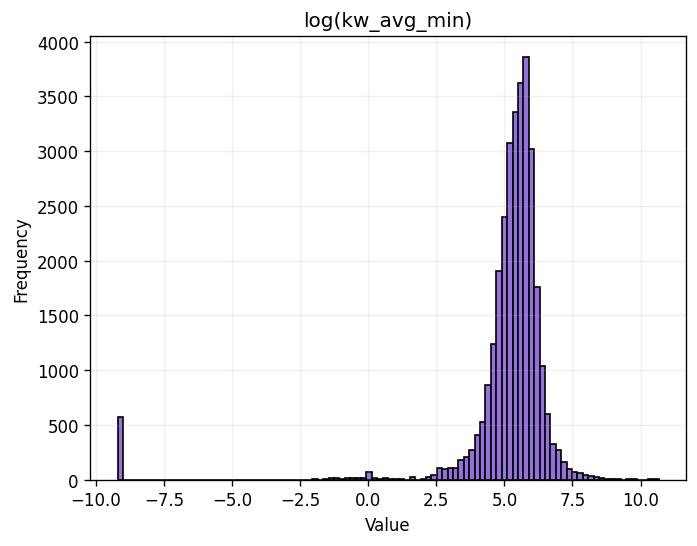

minimum value -inf
maximum value 10.664967386688145


/Users/micolrosini/Desktop/dsl project/python_venv/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [28]:
plot_log_hist("kw_avg_min",df)

### kw_min_max
Better applying log transformation even if we will obtain a lot of 0's

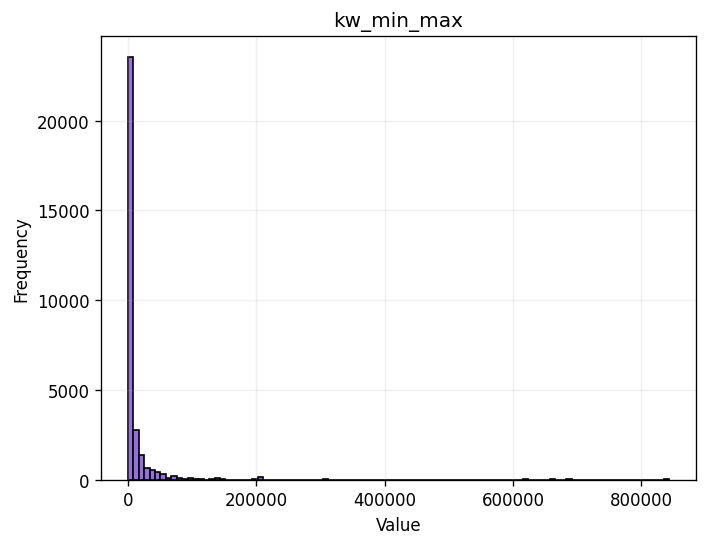

minimum value 0.0
maximum value 843300.0


In [29]:
plot_hist("kw_min_max", df)

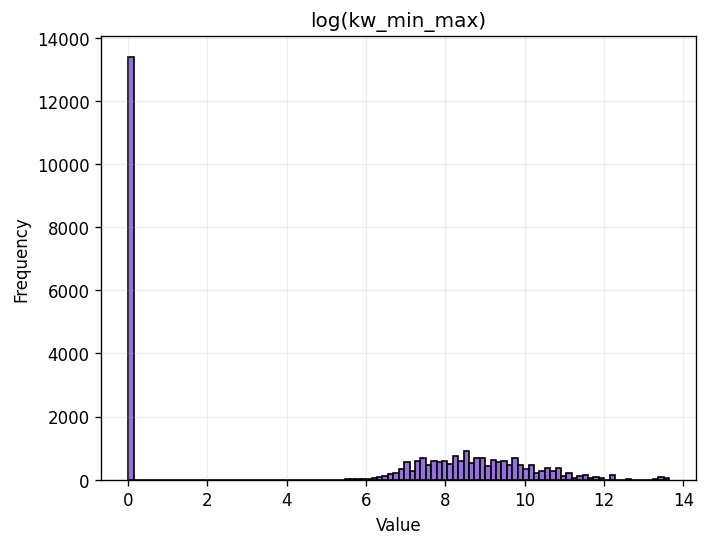

minimum value 0.0
maximum value 13.64507923137965


In [30]:
plot_log_hist("kw_min_max",df)

### kw_max_max
Try to apply log or don't and decide which is the best. It is a very sparse distribution.

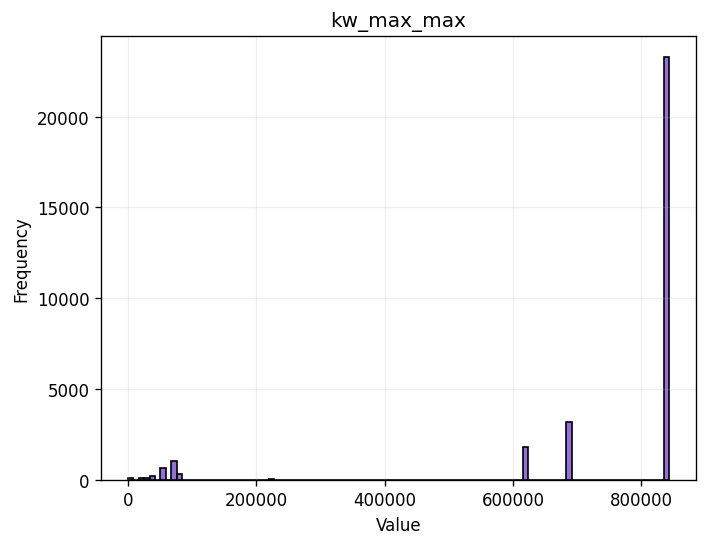

minimum value 0.0
maximum value 843300.0


In [31]:
plot_hist("kw_max_max",df)

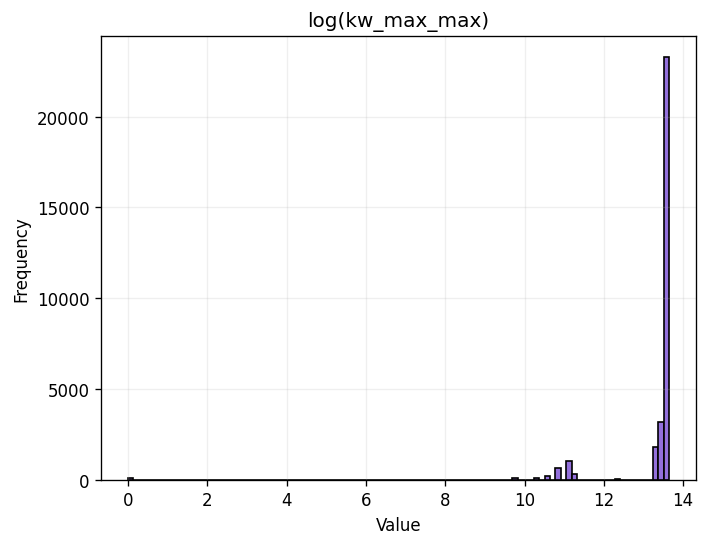

minimum value 0.0
maximum value 13.64507923137965


In [32]:
plot_log_hist("kw_max_max",df)

### kw_avg_max
Bell shaped. We can apply normalization.

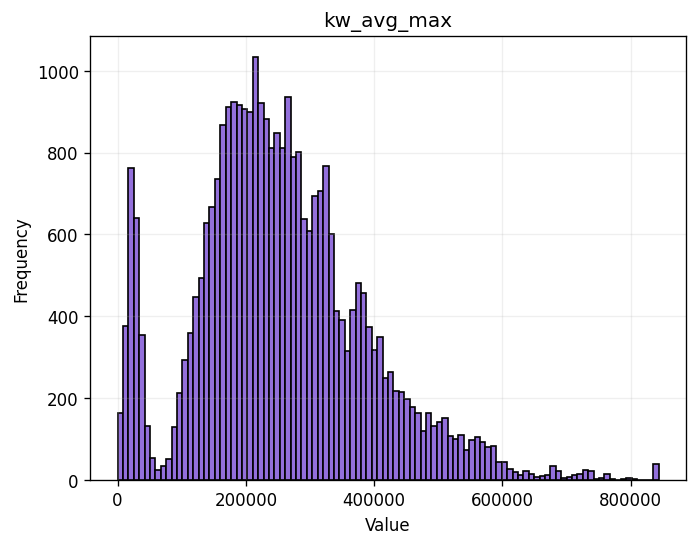

minimum value 0.0
maximum value 843300.0


In [33]:
plot_hist("kw_avg_max",df)

### kw_min_avg
Maybe it will be better to apply log transformation.

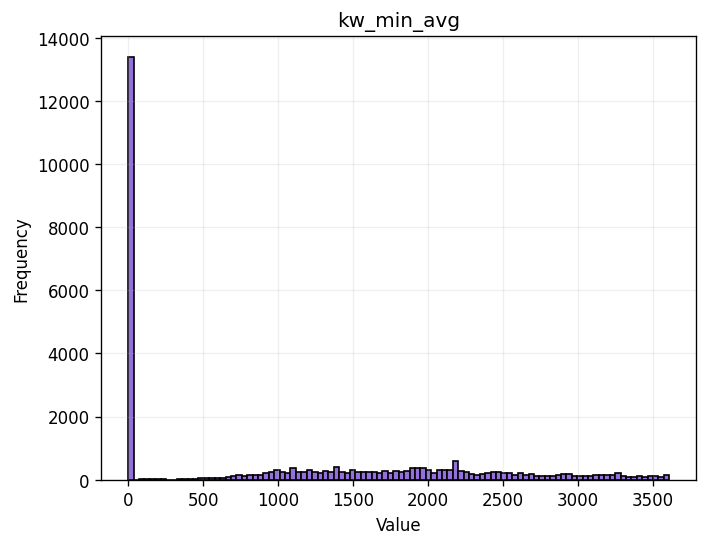

minimum value -1.0
maximum value 3610.12497206


In [34]:
plot_hist("kw_min_avg",df)

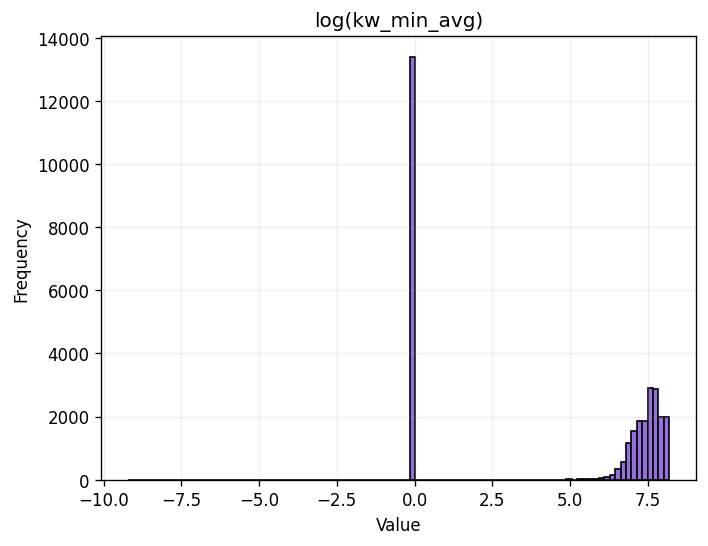

minimum value -inf
maximum value 8.191774629390858


In [35]:
plot_log_hist("kw_min_avg",df)

### kw_max_avg
Better apply log transformation.

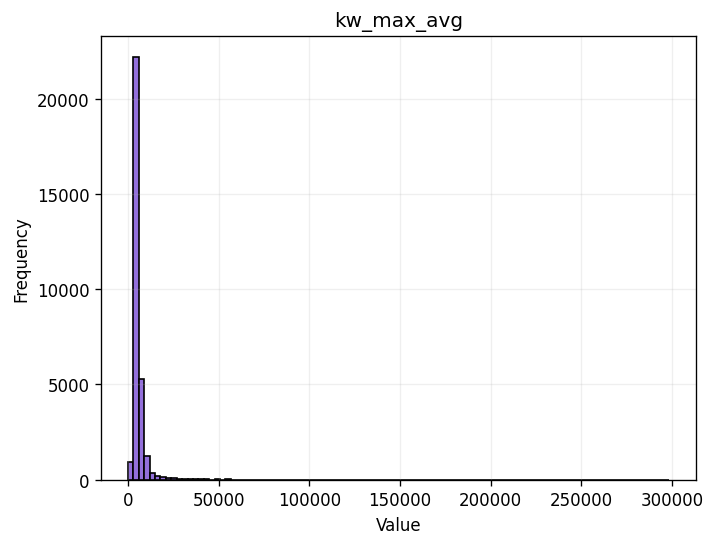

minimum value 0.0
maximum value 298400.0


In [36]:
plot_hist("kw_max_avg",df)

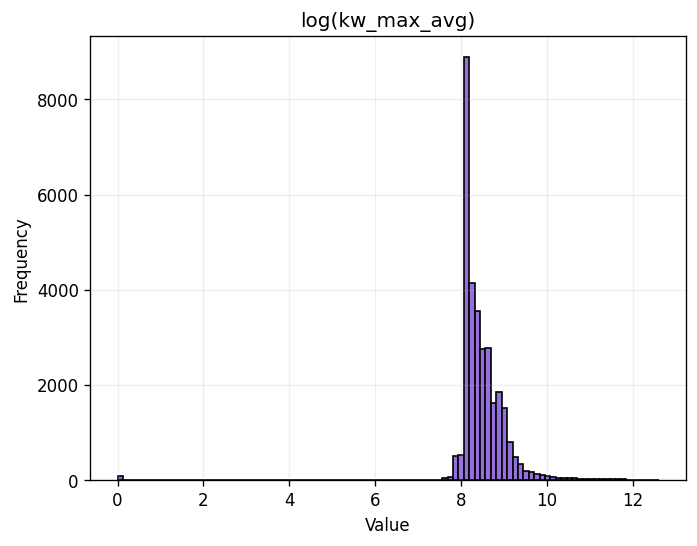

minimum value 0.0
maximum value 12.606193498512562


In [37]:
plot_log_hist("kw_max_avg",df)

### kw_avg_avg
Maybe a log transformation will achieve better results.

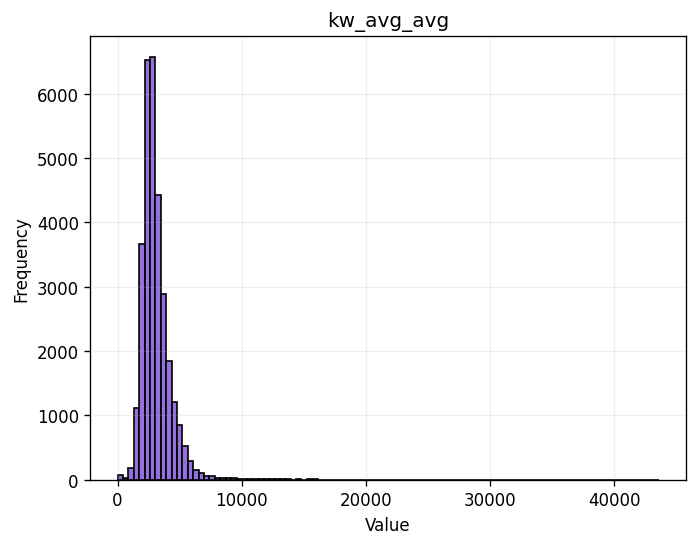

minimum value 0.0
maximum value 43567.6599458


In [38]:
plot_hist("kw_avg_avg",df)

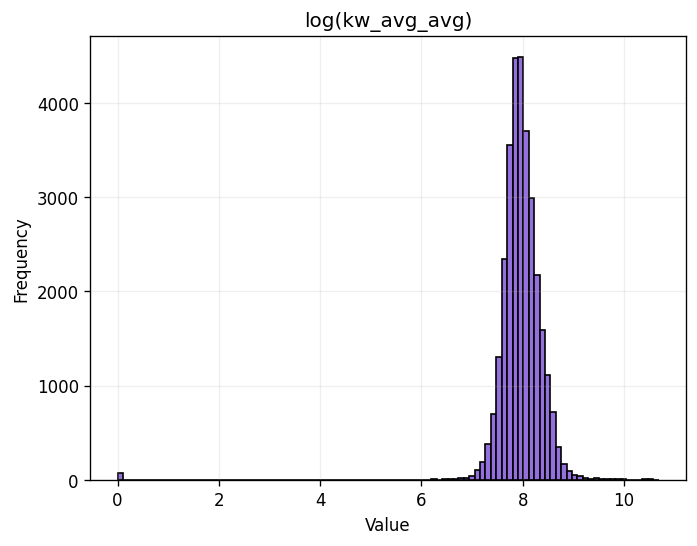

minimum value 0.0
maximum value 10.682093362287802


In [39]:
plot_log_hist("kw_avg_avg",df)

### self_reference_min_shares

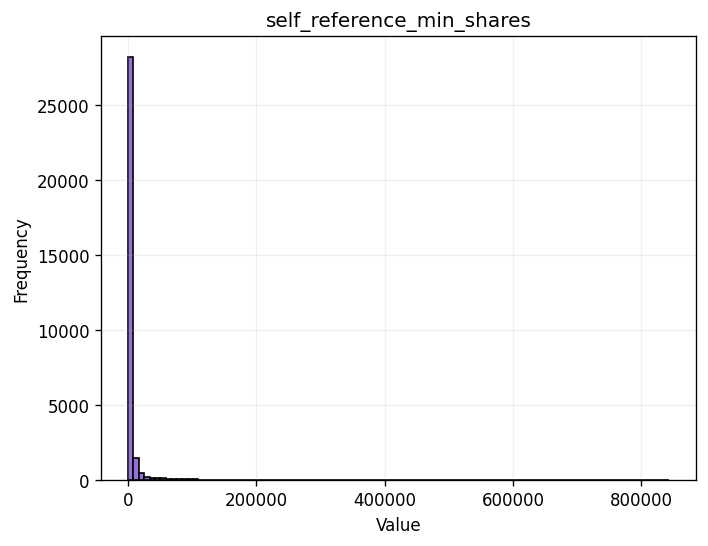

minimum value 0.0
maximum value 843300.0


In [40]:
plot_hist("self_reference_min_shares",df)

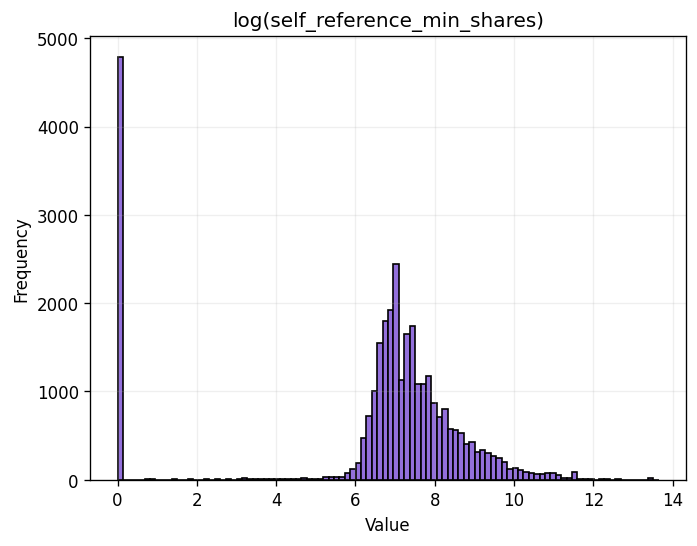

minimum value 0.0
maximum value 13.64507923137965


In [41]:
plot_log_hist("self_reference_min_shares",df)

### self_reference_max_shares
Not bell shape, it is better to apply log transformation


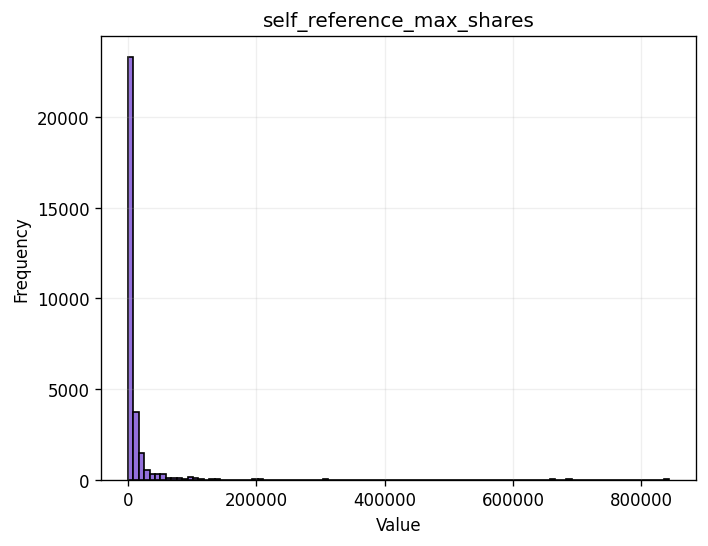

minimum value 0.0
maximum value 843300.0


In [42]:
plot_hist("self_reference_max_shares",df)

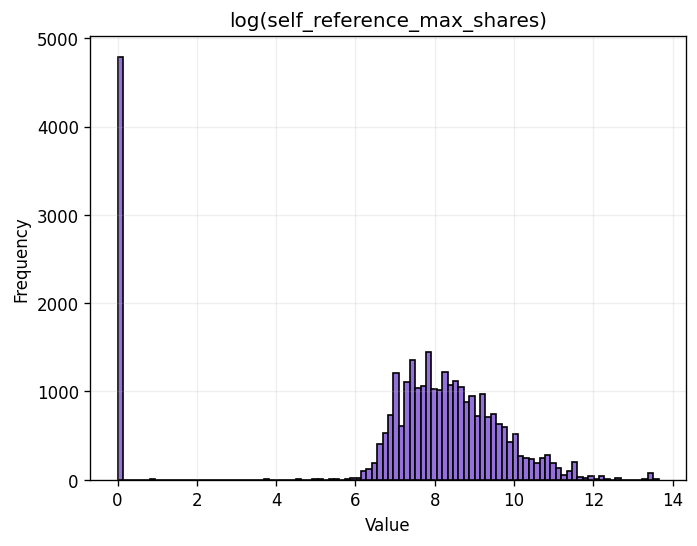

minimum value 0.0
maximum value 13.64507923137965


In [43]:
plot_log_hist("self_reference_max_shares",df)

### self_reference_avg_sharess
It is better to apply log transformation.

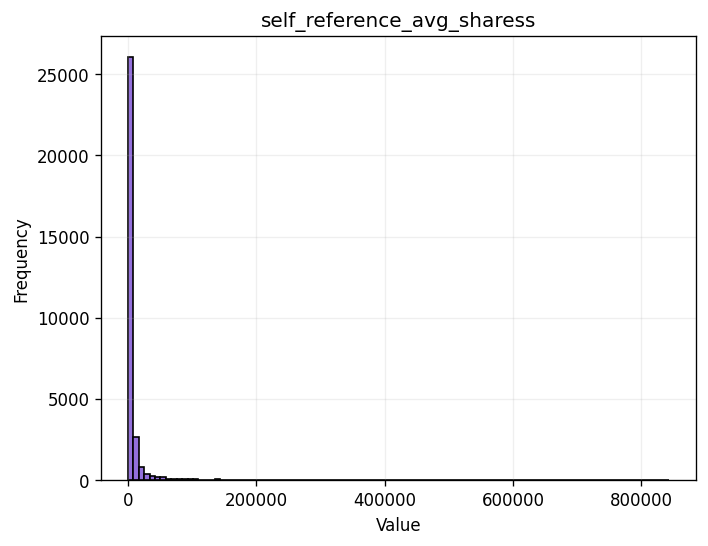

minimum value 0.0
maximum value 843300.0


In [44]:
plot_hist("self_reference_avg_sharess",df)

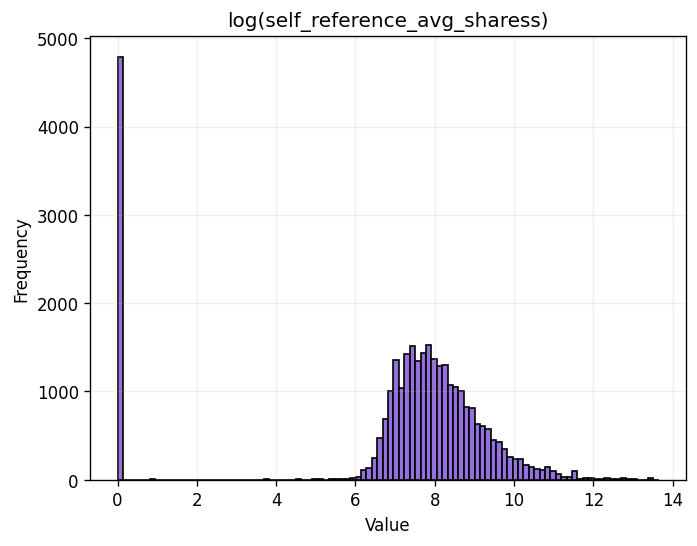

minimum value 0.0
maximum value 13.64507923137965


In [45]:
plot_log_hist("self_reference_avg_sharess",df)

### LDA_00
Applying log transformation won't change so much

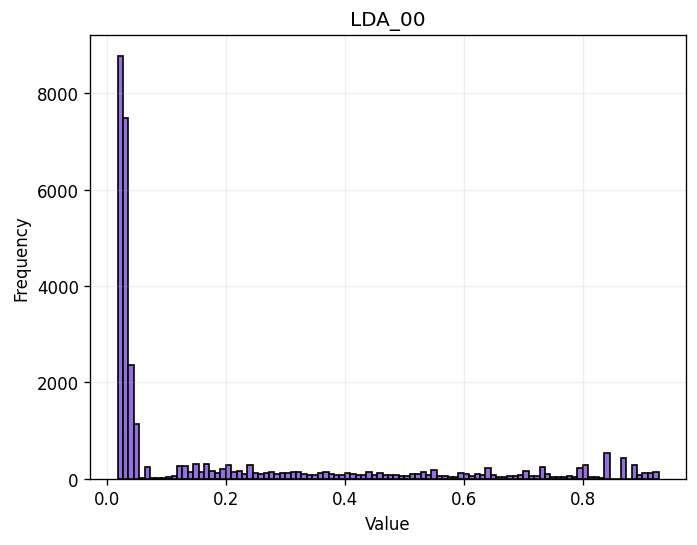

minimum value 0.0181826500149
maximum value 0.926994384393


In [46]:
plot_hist("LDA_00",df)

### LDA_01
Applying log transformation won't change so much

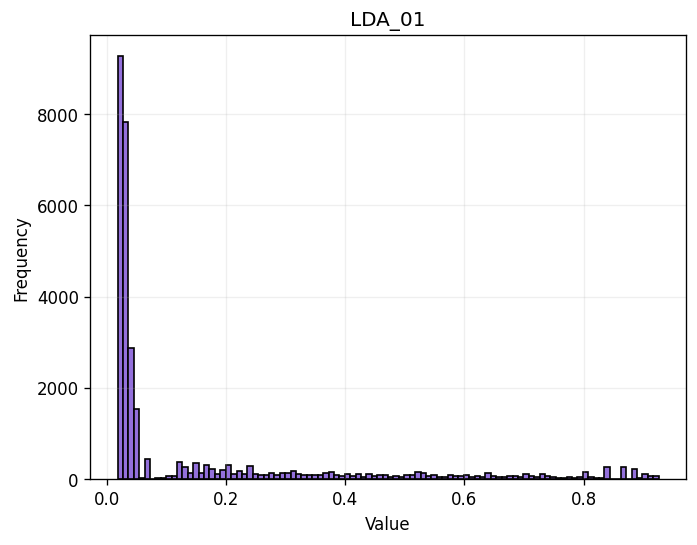

minimum value 0.0181820727
maximum value 0.925946986138


In [47]:
plot_hist("LDA_01",df)

### LDA_02
Applying log transformation won't change so much

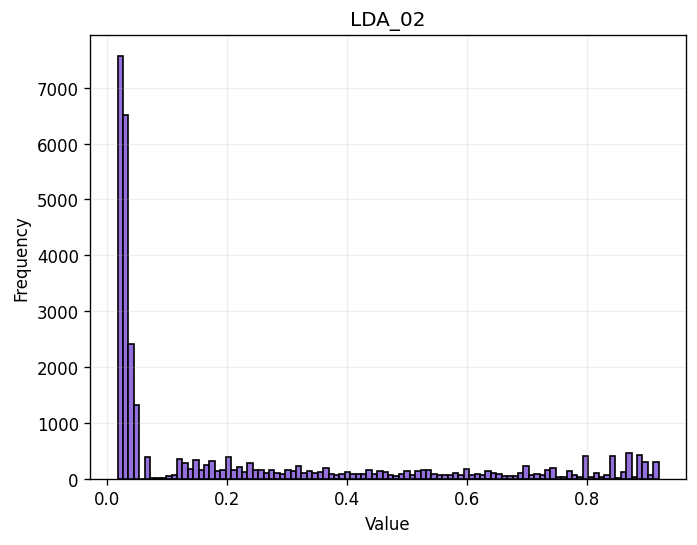

minimum value 0.0181819190697
maximum value 0.919999088666


In [48]:
plot_hist("LDA_02",df)

### LDA_03
Applying log transformation won't change so much

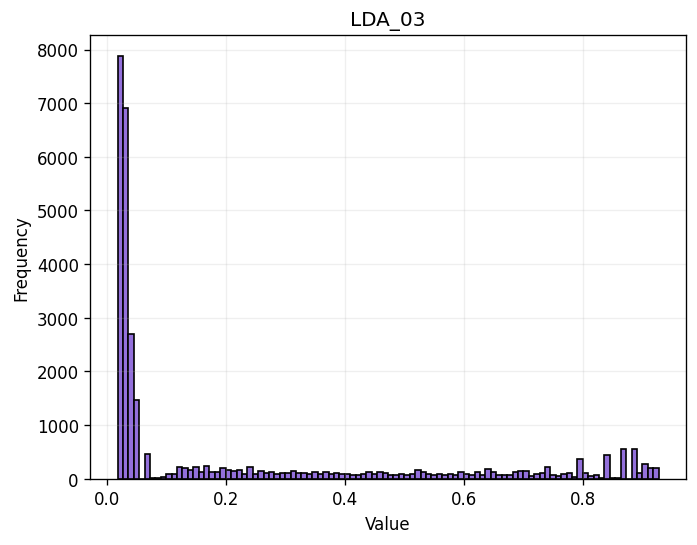

minimum value 0.018181994461
maximum value 0.926533782685


In [49]:
plot_hist("LDA_03",df)

### LDA_04
Applying log transformation won't change so much

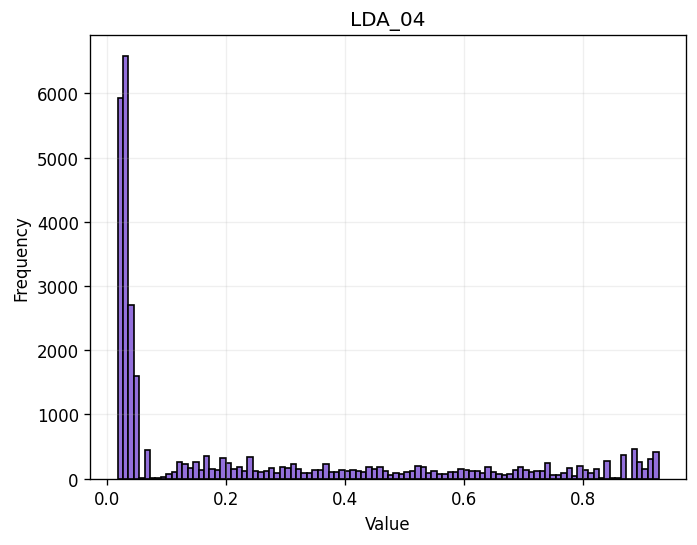

minimum value 0.0181822786096
maximum value 0.927190809258


In [50]:
plot_hist("LDA_04",df)

### global_subjectivity
Perfect, normalization can be applied

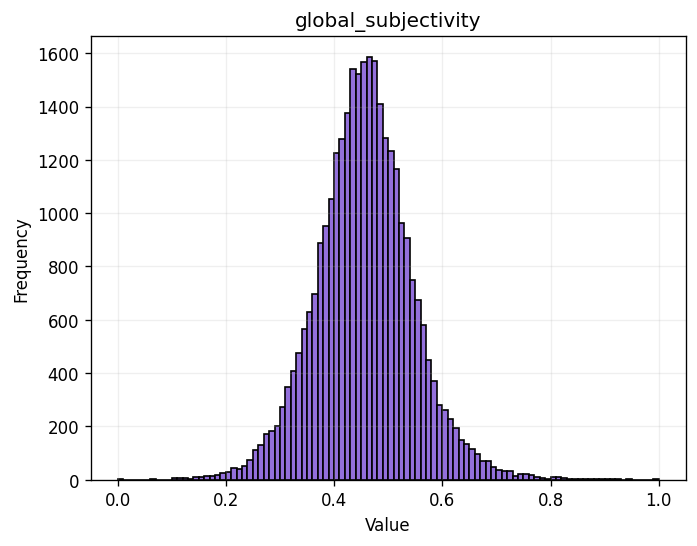

minimum value 0.0
maximum value 1.0


In [51]:
plot_hist("global_subjectivity",df)

### global_sentiment_polarity
Perfect, normalization can be applied

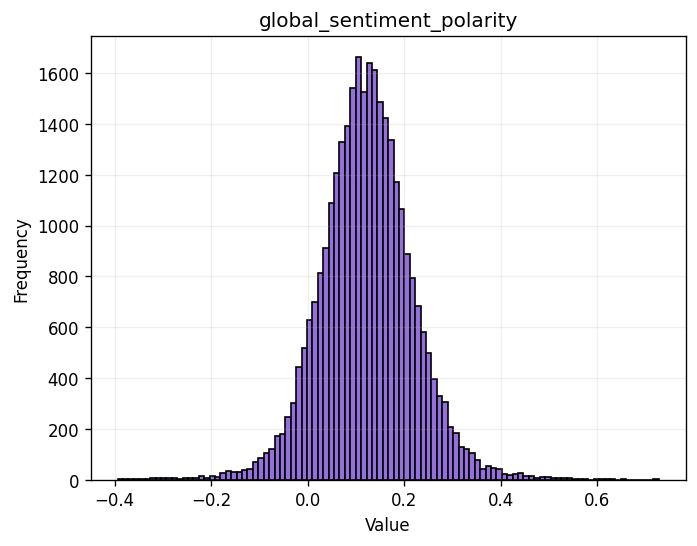

minimum value -0.39375
maximum value 0.727840909091


In [52]:
plot_hist("global_sentiment_polarity",df)

### global_rate_positive_words
Perfect, normalization can be applied

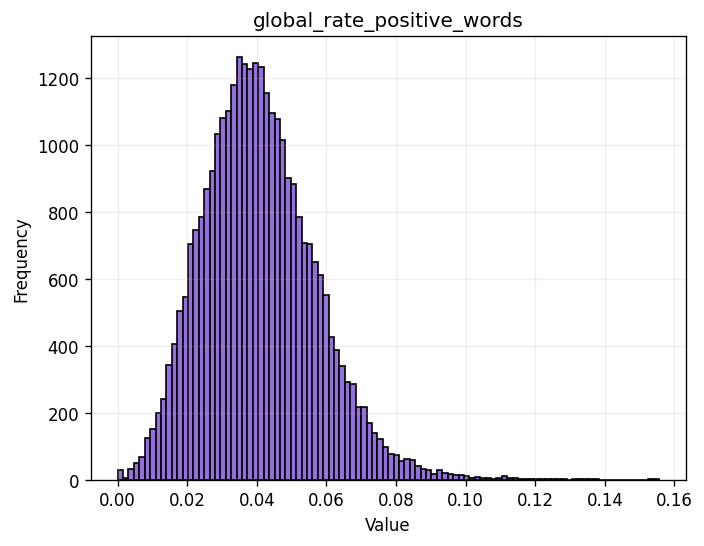

minimum value 0.0
maximum value 0.155487804878


In [53]:
plot_hist("global_rate_positive_words",df)

### global_rate_negative_words
Log transformation won't change the things

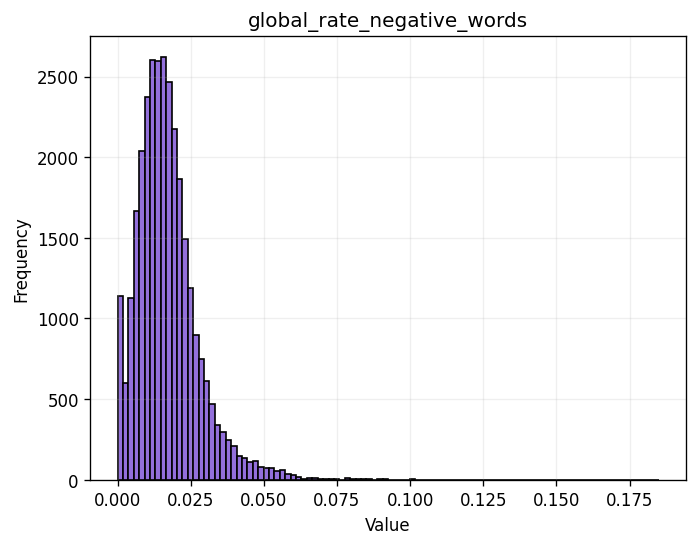

minimum value 0.0
maximum value 0.184931506849


In [54]:
plot_hist("global_rate_negative_words",df)

### rate_positive_words
Bell shaped, just apply normaliztaion

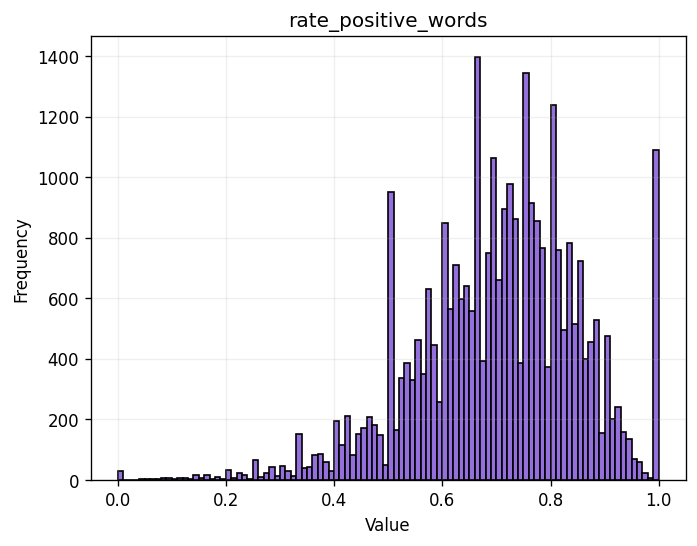

minimum value 0.0
maximum value 1.0


In [55]:
plot_hist("rate_positive_words",df)

### rate_negative_words
Perfect, just apply normalization

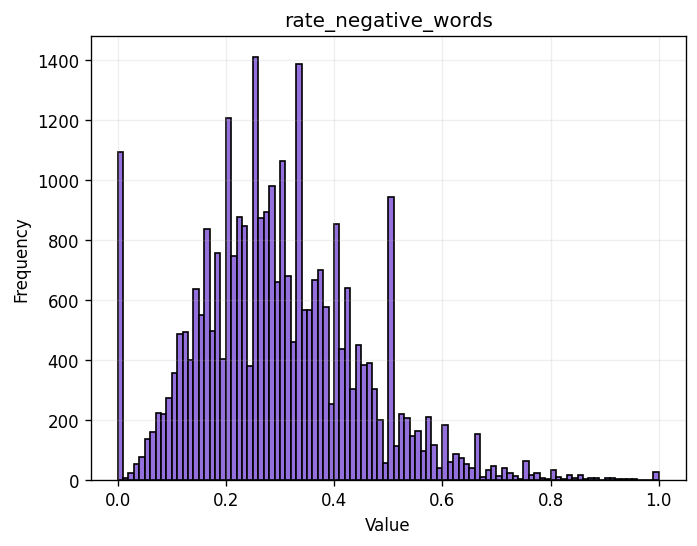

minimum value 0.0
maximum value 1.0


In [56]:
plot_hist("rate_negative_words",df)

### avg_positive_polarity
Perfect, just apply normalization

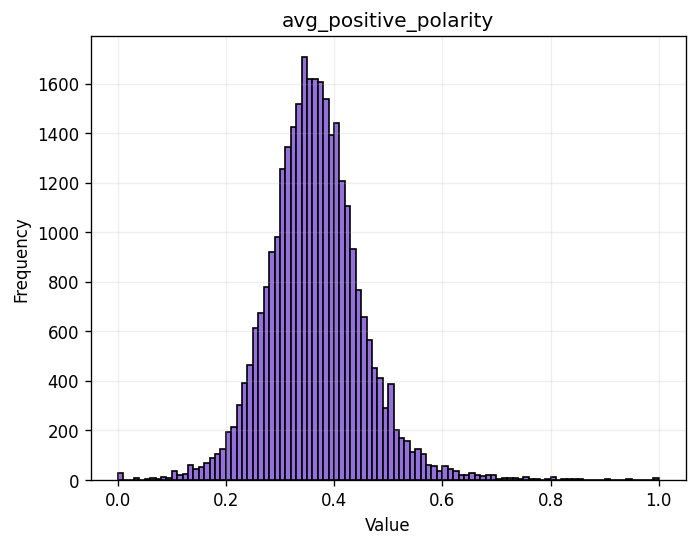

minimum value 0.0
maximum value 1.0


In [57]:
plot_hist("avg_positive_polarity",df)

### min_positive_polarity

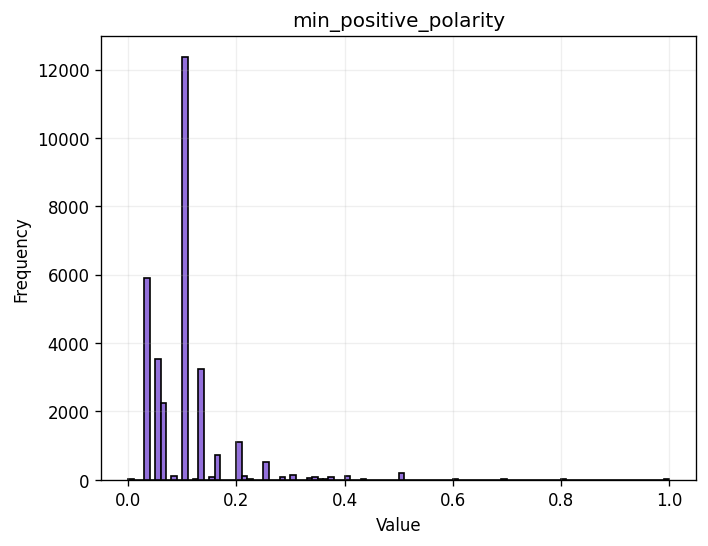

minimum value 0.0
maximum value 1.0


In [58]:
plot_hist("min_positive_polarity",df)

### max_positive_polarity
Applying log transformation won't change the things so much

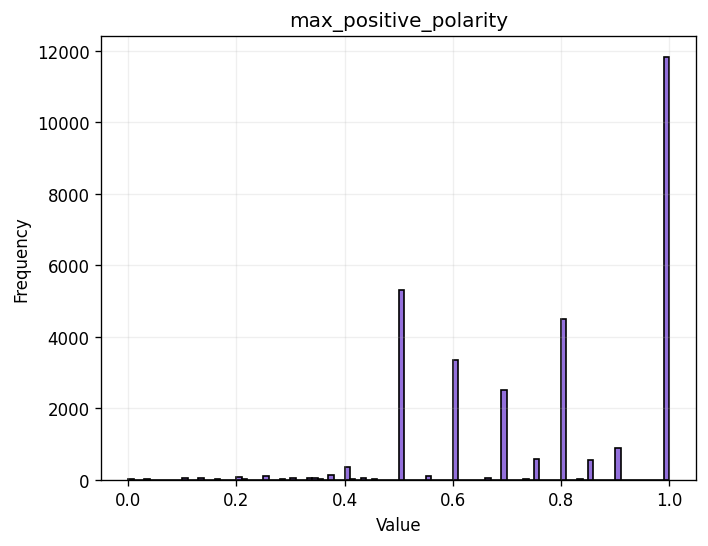

minimum value 0.0
maximum value 1.0


In [59]:
plot_hist("max_positive_polarity",df)

### avg_negative_polarity
perfect, just normalize

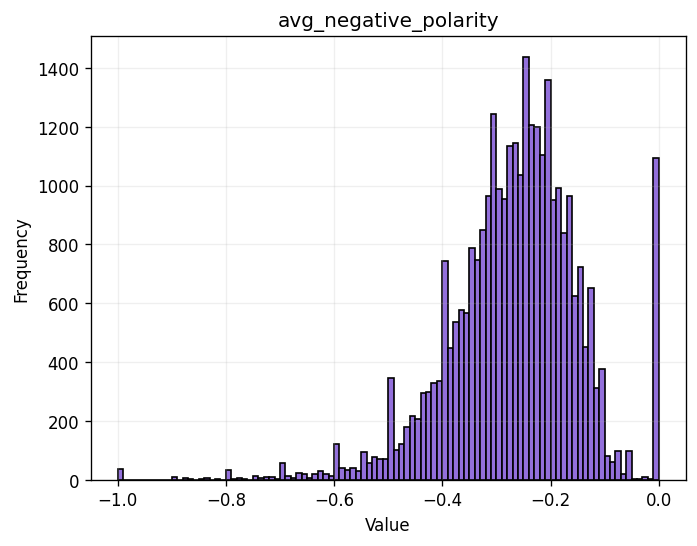

minimum value -1.0
maximum value 0.0


In [60]:
plot_hist("avg_negative_polarity",df)

### min_negative_polarity
Perfect like this

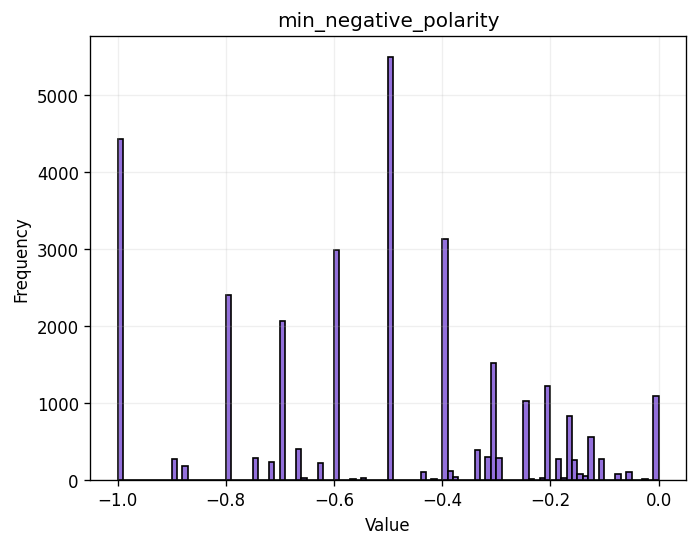

minimum value -1.0
maximum value 0.0


In [61]:
plot_hist("min_negative_polarity",df)

### max_negative_polarity
Good like this, outliers can be removed

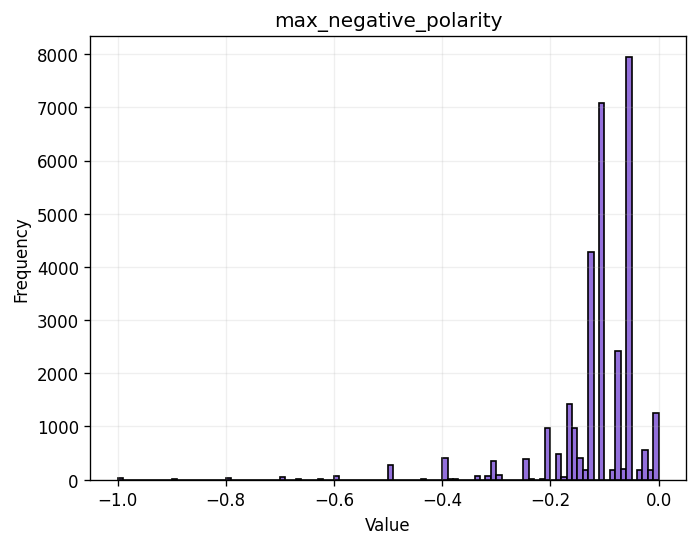

minimum value -1.0
maximum value 0.0


In [62]:
plot_hist("max_negative_polarity",df)

### title_subjectivity
ok like this.

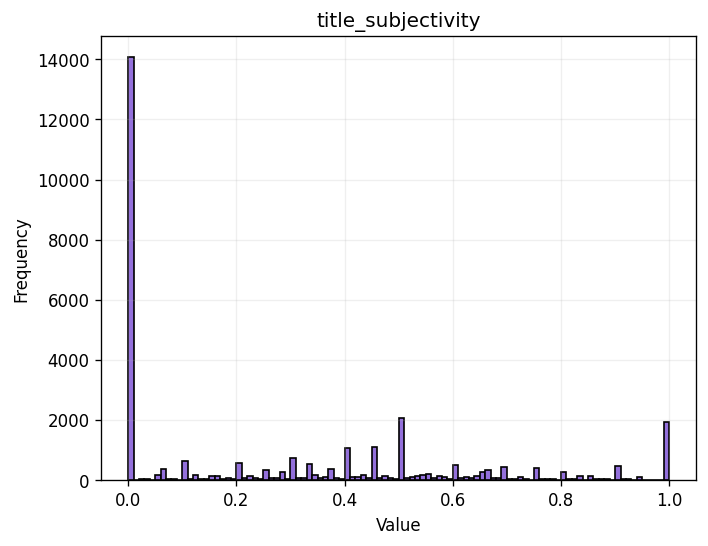

minimum value 0.0
maximum value 1.0


In [63]:
plot_hist("title_subjectivity",df)

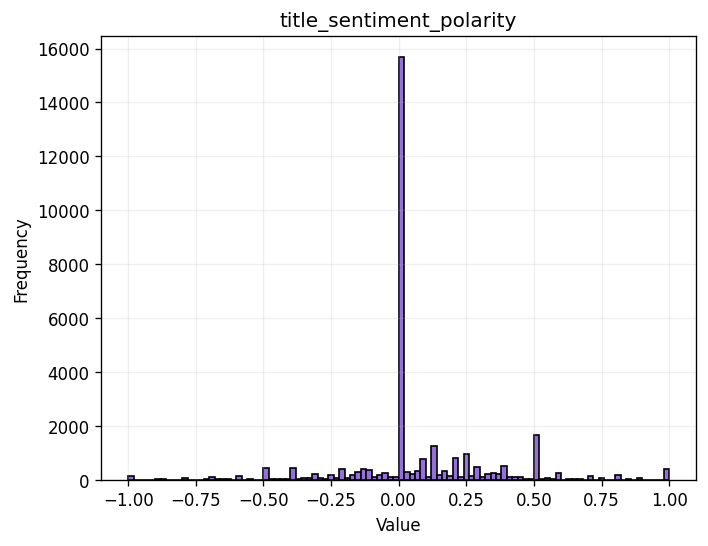

minimum value -1.0
maximum value 1.0


In [64]:
plot_hist("title_sentiment_polarity",df)

### abs_title_subjectivity
Ok like this

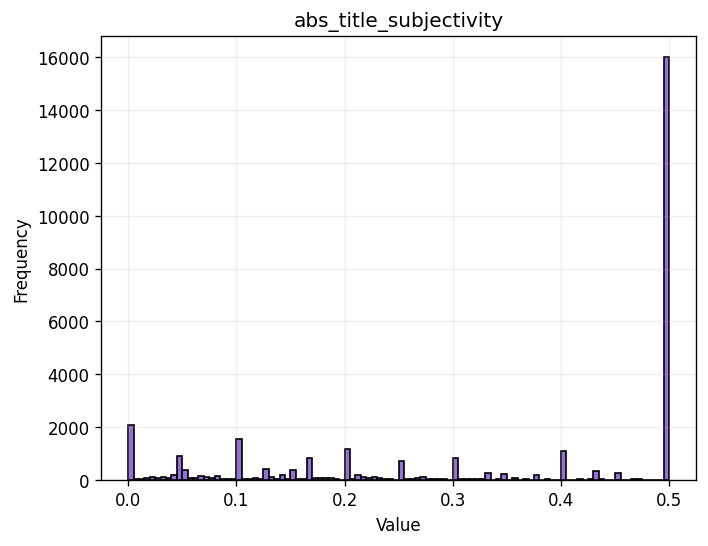

minimum value 0.0
maximum value 0.5


In [65]:
plot_hist("abs_title_subjectivity",df)

### abs_title_sentiment_polarity
ok like this

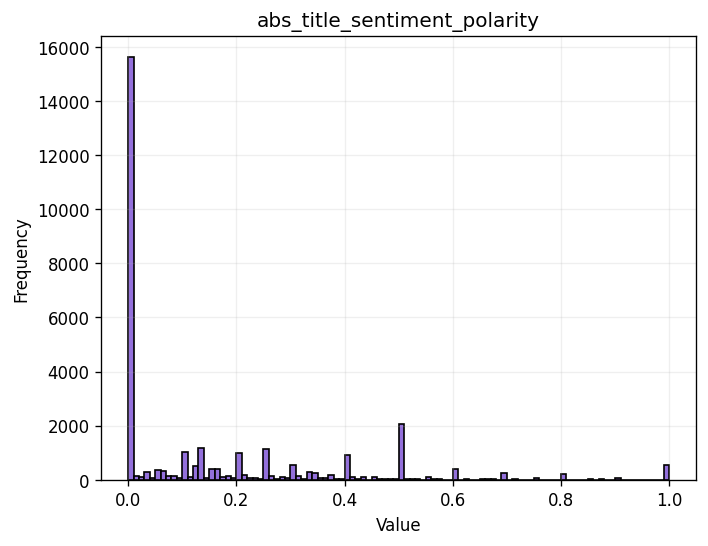

minimum value 0.0
maximum value 1.0


In [66]:
plot_hist("abs_title_sentiment_polarity",df)

### SHARES
It must me log transformed

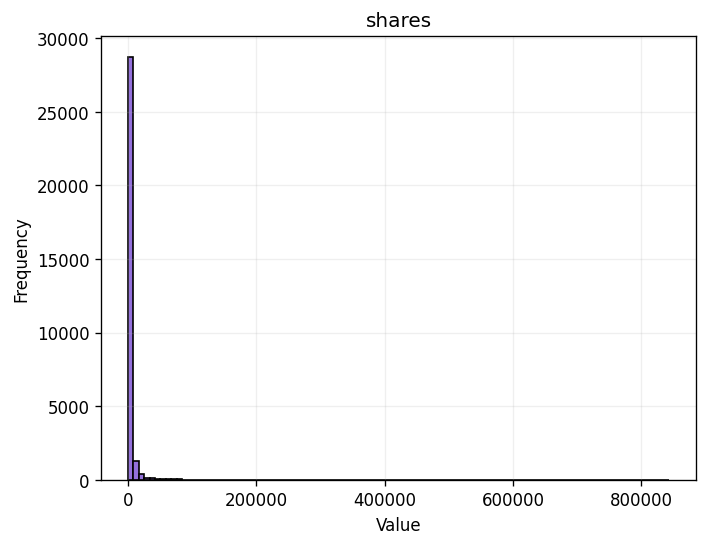

minimum value 5
maximum value 843300


In [67]:
plot_hist("shares",df)

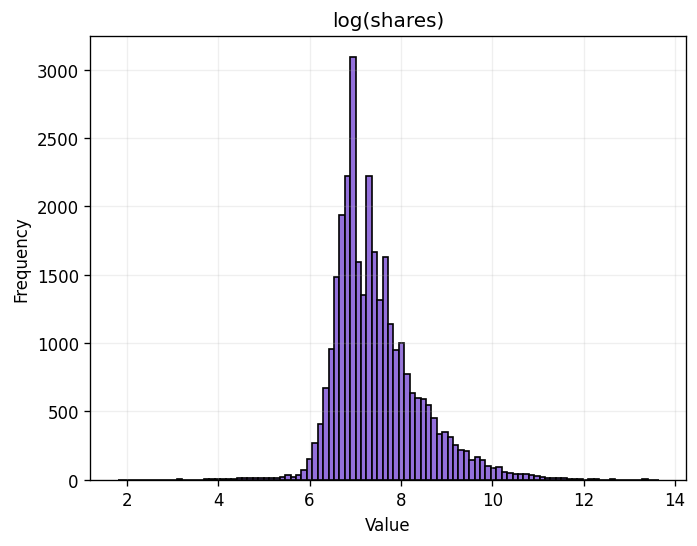

minimum value 1.791759469228055
maximum value 13.64507923137965


In [68]:
plot_log_hist("shares",df)